# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Install graphviz if you haven't done so. 
# You need to run the following command in the Anaconda Prompt window (Launch CMD.exe prompt in the Anaconda Navigator)
# conda install -c conda-forge python-graphviz

# Decision Tree

Loading iris dataset and initializing the variables. (Notice we are only using two features, pental length and width, for this training.

Decision Trees can perform both classification and regression tasks. **"DecisionTreeClassifier"** is used here for classification. If you need to train a regression model, you can use **"DecisionTreeRegressor"** instead. 

Scikit-Learn uses the **CART** algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

By default, the **Gini impurity** measure is used, but you can select the **entropy impurity** measure instead by setting the criterion hyperparameter to "entropy". So, should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

Decision Trees make very few assumptions about the training data (as opposed to linear models, which assume that the data is linear, for example). If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely—indeed, most likely overfitting it. 

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training (regularization). The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree:
- min_samples_split: the minimum number of samples a node must have before it can be split
- min_samples_leaf: the minimum number of samples a leaf node must have)
- min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- max_leaf_nodes: the maximum number of leaf nodes
- max_features: the maximum number of features that are evaluated for splitting at each node

Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

## Load Data

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

## Training

In [ ]:
# tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42,criterion="entropy")
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Visualizing
The image files are saved in the "images" folder/directory of the current path. 

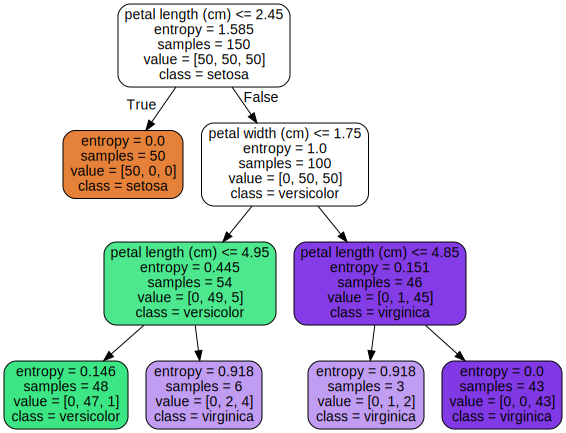

In [119]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

The following graph shows this Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the lefthand area is pure (only Iris setosa), it cannot be split any further. However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the Decision Tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines).

Saving figure decision_tree_decision_boundaries_plot


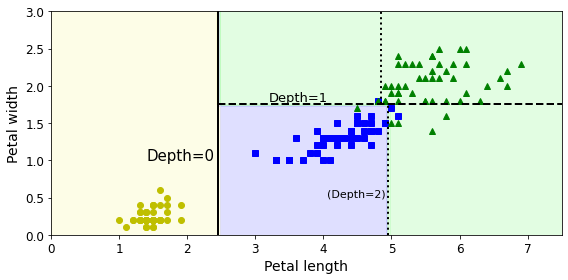

In [121]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [41]:
# Predict the category of three instances:
#instance 1: petal length = 1.5 and petal width = 0.2
#instance 2: petal length = 5.6 and petal width = 1.4
#instance 3: petal length = 5.9 and petal width = 2.1
tree_clf.predict_proba([[1.5, 0.2], [5.6, 1.4], [5.9, 2.1]])

array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ]])

In [42]:
pre = tree_clf.predict([[1.5, 0.2], [5.6, 1.4], [5.9, 2.1]])

In [43]:
iris.target_names[pre]

array(['setosa', 'virginica', 'virginica'], dtype='<U10')

# Random Forest

In [122]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create a random forest Classifier. 
rf_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16)

#Train Random Forest with Traingin Data and Test Data.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42)

# Train the Classifier 
# rf_clf.fit(iris.data, y)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500)

In [123]:
# rf_clf.predict_proba([[5.1, 3.5, 1.4, 0.2]])
y_pred = rf_clf.predict(X_test)

In [124]:
# # pre=rf_clf.predict([[5.1, 3.5, 1.4, 0.2]])

# Predicting the problem given parameters:
pre_instance=rf_clf.predict([[6.1, 2.6, 1.5, 0.2]])
# Print out the category name
print("Sample Prediction: %s"%(iris.target_names[pre_instance]))

Sample Prediction: ['setosa']


In [126]:
iris.target_names[pre_instance]

score = rf_clf.score(X_test, y_test)

# Import Confusion Matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)

print("The score is: %s"%(score))
print("The confusion matrix is:")
print(cf)

The score is: 1.0
The confusion matrix is:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## Run the program and complete the following exercises. (20 points)
1. For Decision Tree:
    - (3 points) Based on the output from tree_clf.predict_proba and tree_clf.predict, explain the predicting results. (How do you decide which category an instance belongs to?) 
    - (3 points) Were the predictions for these instances correct? Why?
    - (3 points) Modify the DecisionTreeClassifier model with the following hyperparameter settings:
        - maximum depth: 3
        - measure with **"entropy"** instead of **"Gini impurity"**<br>
2. For Random Forest:
    - (2 points) Split the original dataset into training set (75%) and test set (25%).
    - (2 points) Train the random forest with the training set. 
    - (2 points) Apply the trained classifier to the test data. 
    - (2 points) Predict the category of the following instance (print out the category name): <br>
        sepal length = 6.1, sepal width = 2.6, petal length = 1.5, petal width = 0.2 
    - (2 points) Print the score and the confusion matrix of the classifier. <br>
  **Note:** You can directly update the code for coding questions. You need to answer the remaining questions in a Markdown field. <br>
3. (1 points) Create a new Markdown field at the end of this file and put your answers in this field. Submit this file to the Blackboard. 

# Answers:

1. a - Decision trees classify instances by traversing the tree from the root node to a leaf node. At each node, the tree compares the value of the current feature to a threshold value. If the value is less than or equal to the threshold, the tree moves to the left child node. Otherwise, the tree moves to the right child node. The process continues until the tree reaches a leaf node. The class label of the leaf node is the predicted class of the instance.

   b - Yes, the predictions for all three instances were correct. This is because the decision tree was trained on a dataset of correctly labeled Iris examples. However, it is important to note that decision trees can overfit the training data, meaning that they may perform well on the training data but not on new data. To avoid overfitting, it is important to use regularization techniques such as pruning.
   
   
2. 